In [19]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [36]:
!mkdir Customer_churn_prediction
%cd Customer_churn_prediction


/content/Customer_churn_prediction


In [20]:
import pandas as pd

#Load dataset
df = pd.read_csv("/content/drive/MyDrive/MLCW/telco_churn.csv")

#Show first 5 rows
print(df.head())

#Show dataset shape (rows, columns)
print(df.shape)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [21]:
#Column names
print(df.columns)

#Data types
print(df.dtypes)

#Missing values
print(df.isnull().sum())

#Statistical summary
print(df.describe())


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
customerID       

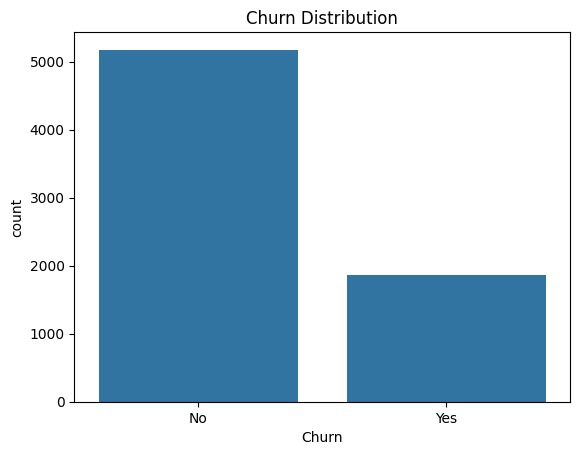

In [22]:
#Churn Distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


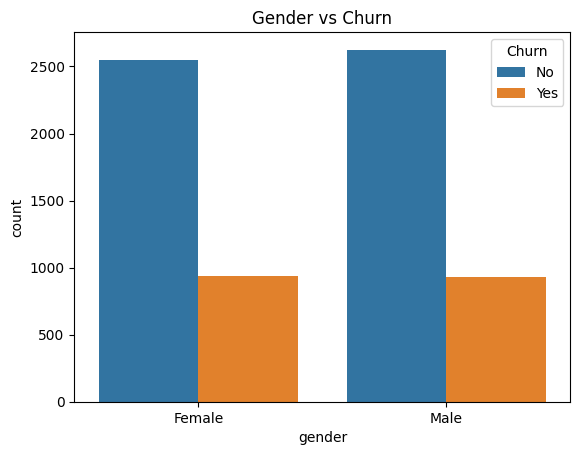

In [23]:
#Gender vs Churn
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Gender vs Churn")
plt.show()


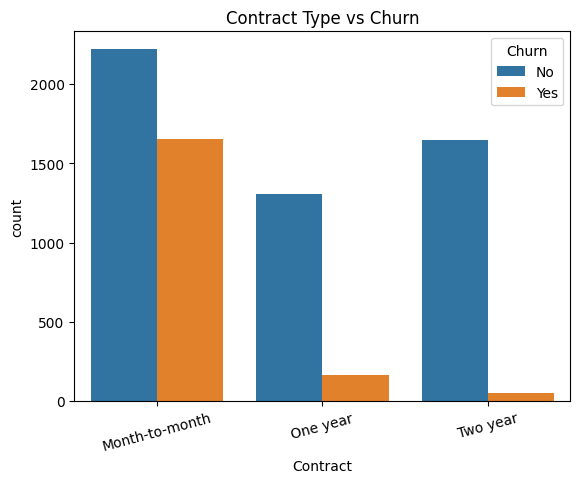

In [24]:
#Contract Type vs Churn
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.show()


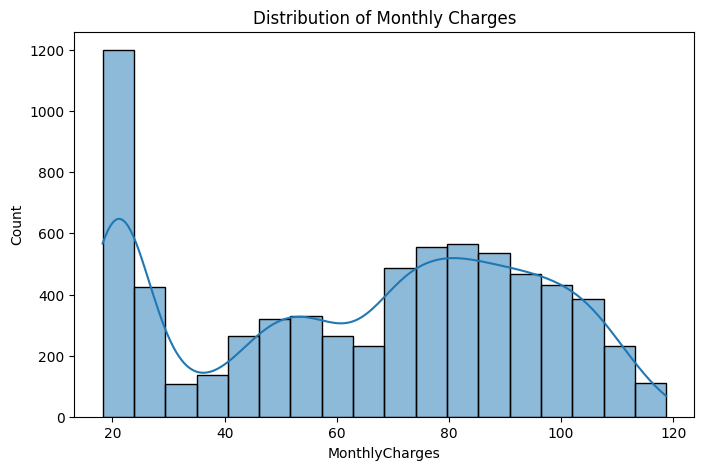

In [25]:
#Monthly Charges Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Distribution of Monthly Charges")
plt.show()


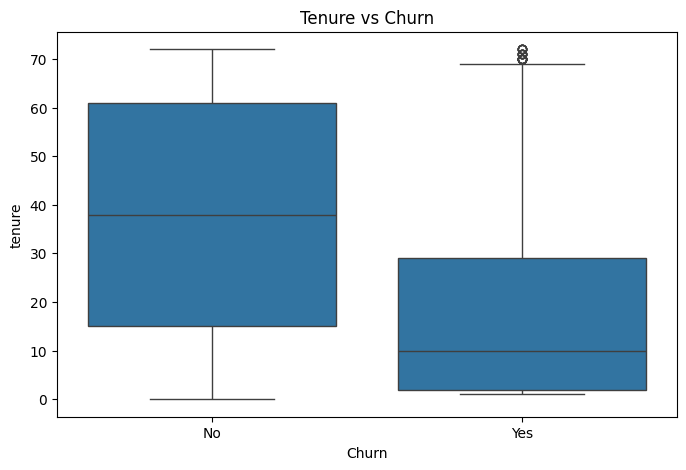

In [26]:
#Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


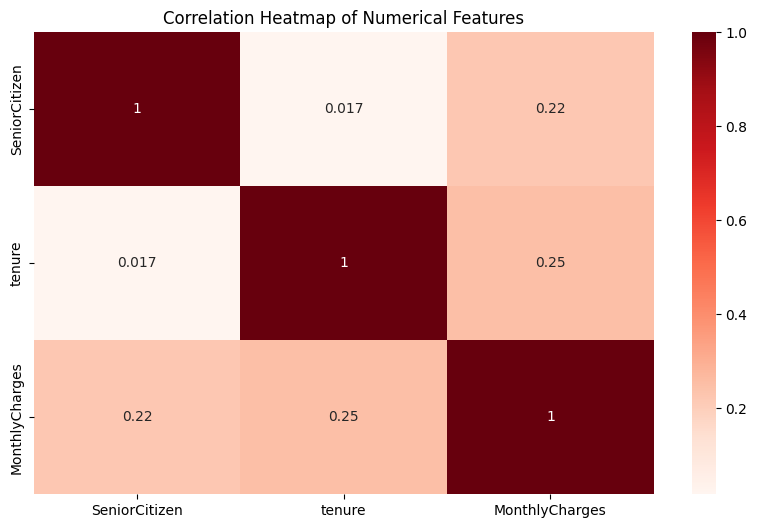

In [27]:
#Check correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Reds")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [28]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [29]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
